# Development notebook for testing the visualization module in QuTiP

# Install Lib

In [28]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# Hinton

In [2]:
rho = rand_dm(5)

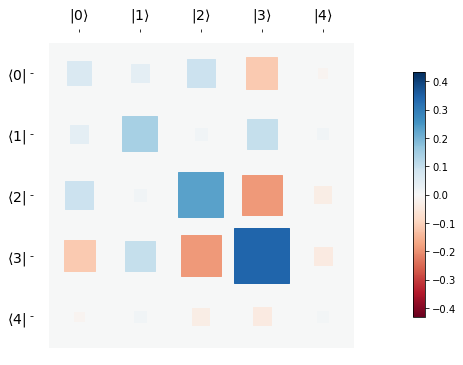

In [3]:
hinton(rho);

# Sphereplot

In [4]:
theta = np.linspace(0,     np.pi, 90)
phi   = np.linspace(0, 2 * np.pi, 60)

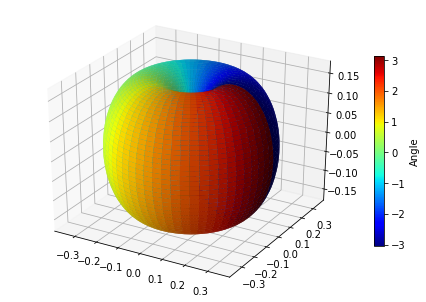

In [5]:
sphereplot(theta, phi, orbital(theta, phi, basis(3, 0)));

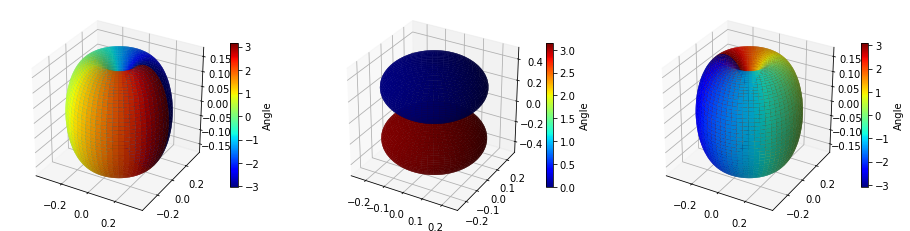

In [6]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 3, 1, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 0)), fig, ax);

ax = fig.add_subplot(1, 3, 2, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 1)), fig, ax);

ax = fig.add_subplot(1, 3, 3, projection='3d')
sphereplot(theta, phi, orbital(theta, phi, basis(3, 2)), fig, ax);

# Matrix histogram

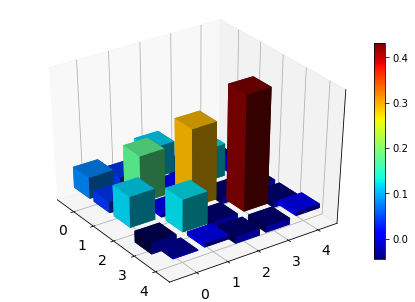

In [7]:
matrix_histogram(rho.full().real);

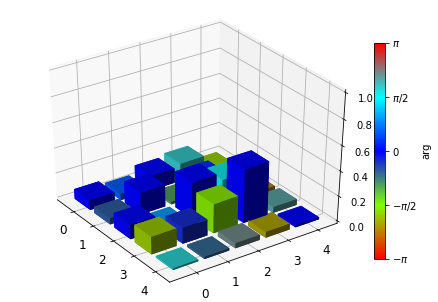

In [8]:
matrix_histogram_complex(rho.full());

# Plot energy levels

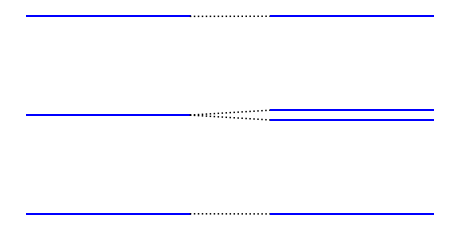

In [9]:
H0 = tensor(sigmaz(), identity(2)) + tensor(identity(2), sigmaz())
Hint = 0.1 * tensor(sigmax(), sigmax())

plot_energy_levels([H0, Hint], figsize=(8,4));

# Plot Fock distribution

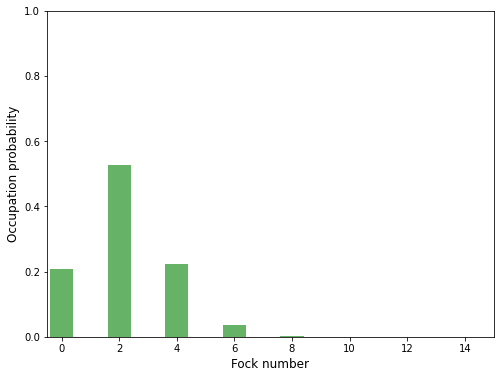

In [11]:
rho = (coherent(15, 1.5) + coherent(15, -1.5)).unit()
plot_fock_distribution(rho);

# Plot Wigner function and Fock distribution

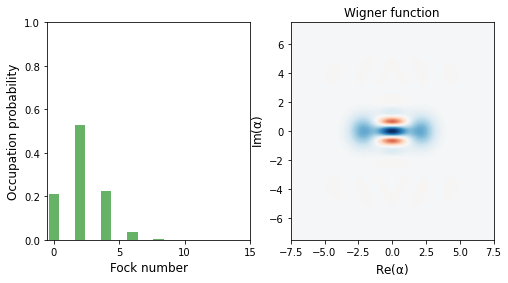

In [12]:
plot_wigner_fock_distribution(rho);

# Plot winger function

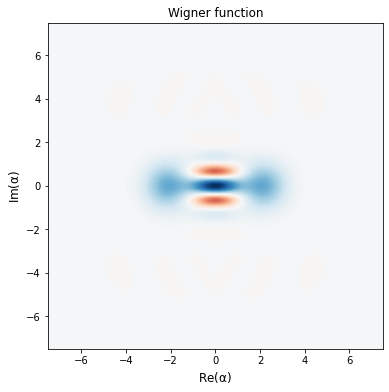

In [13]:
plot_wigner(rho, figsize=(6,6));

# Plot expectation values

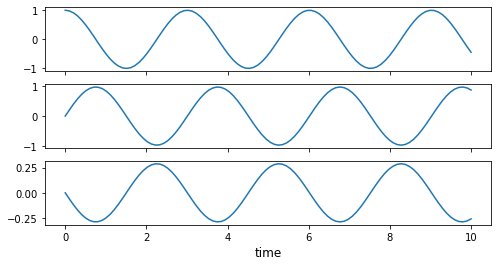

In [15]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = mesolve(H, psi0, times, [], e_ops)
plot_expectation_values(result);

# Bloch sphere

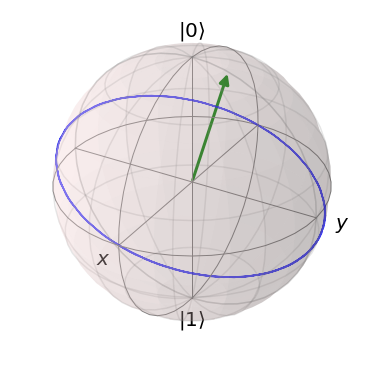

In [16]:
b = Bloch()
b.add_vectors(expect(H.unit(), e_ops))
b.add_points(result.expect, meth='l')
b.make_sphere()

# Plot spin Q-functions

In [31]:
j = 5
psi = spin_state(j, -j)
psi = spin_coherent(j, np.random.rand() * np.pi, np.random.rand() * 2 * np.pi)
rho = ket2dm(psi)

In [32]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

In [33]:
Q, THETA, PHI = spin_q_function(psi, theta, phi)

# 2D

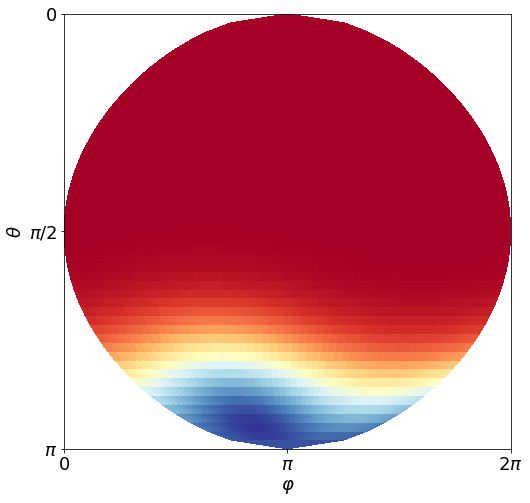

In [34]:
plot_spin_distribution_2d(Q, THETA, PHI);

# 3D

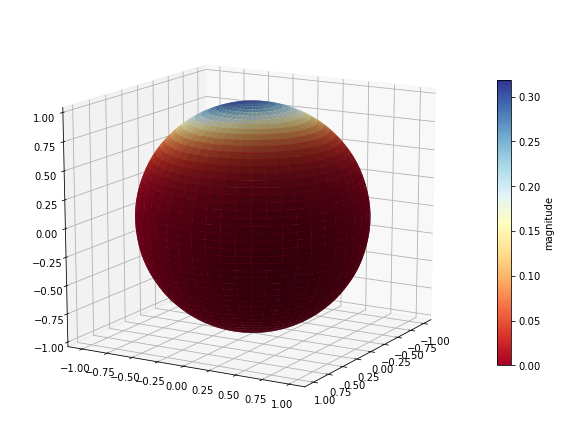

In [35]:
fig, ax = plot_spin_distribution_3d(Q, THETA, PHI);

ax.view_init(15, 30)

# Combined 2D and 3D

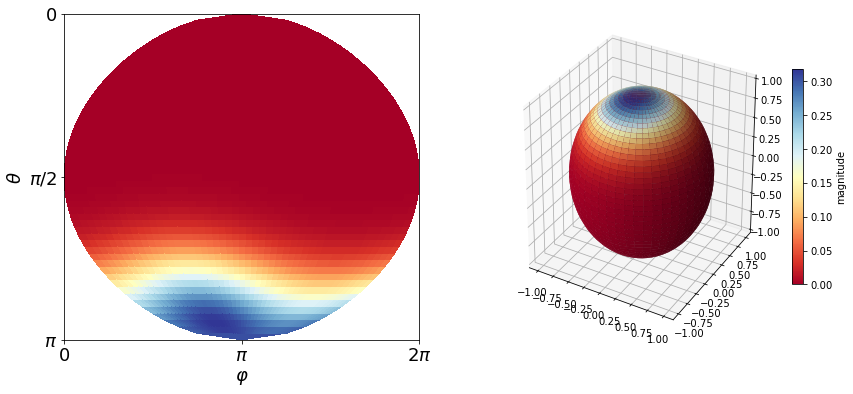

In [36]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = plot_spin_distribution_2d(Q, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(Q, THETA, PHI, fig=fig, ax=ax)

# Plot spin-Wigner functions

In [37]:
W, THETA, PHI = spin_wigner(psi, theta, phi)

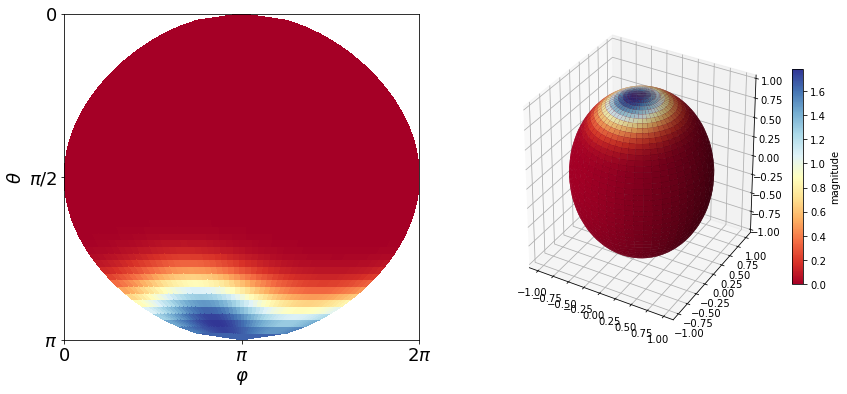

In [38]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = plot_spin_distribution_2d(W.real, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)

In [39]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.2
Numpy,1.18.5
SciPy,1.5.0
matplotlib,3.2.2
Cython,0.29.21
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,7.16.1
Python,"3.8.3 (default, Jul 2 2020, 11:26:31) [Clang 10.0.0 ]"
OS,posix [darwin]
